<a href="https://colab.research.google.com/github/JUSTSUJAY/udl/blob/main/04/Deep_Networks/4_1_Composing_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4.1 -- Composing networks

The purpose of this notebook is to understand what happens when we feed one neural network into another. It works through an example similar to 4.1 and varies both networks

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions

In [69]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [70]:
np.array([-5,5]).clip(0.0)

array([0., 5.])

In [71]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [72]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y

In [73]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('x'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('x'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].

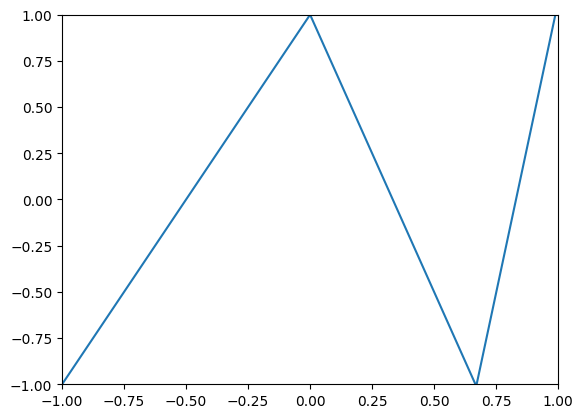

In [74]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

"""
for net1
y = phi0 + phi1 * act(theta10 + theta11*x) + phi2 * act(theta20 + theta21*x) + phi3 * act(theta30 + theta31*x)
y = 1 + -2 * ReLU(theta10 + theta11*x) + -3 * ReLU(theta20 + theta21*x) + 9.3 * ReLU(theta30 + theta31*x)
y = 1 -2*Relu(-x) + -3*Relu(x) + 9.3*Relu(-0.67 + x)
x = -1 : y = 1 -2*Relu(1) + -3*relu(-1) + 9.3*relu(-1.67)
           = 1 -2*1 = -1
x = 0 : y = 1 - 0 + 0 + 0
          = 1

x = 2/3 : y = 1 -2*relu(-2/3) + -3*relu(2/3) + 9.3*relu(-0.67 + 2/3)
            = 1 -0 + -3*(2/3) + 9.3*relu(-0.67 + 2/3)
            = 1 - 2 + ~0 = -1                   Thus at net_1_input of ~2/3 y touches that axis
"""

def net1(x):
  return 1 -2*ReLU(-x) + -3*ReLU(x) + 9.3*ReLU(-0.67 + x)

x = np.arange(-1, 1, 0.001)
y = net1(x=x)

plt.plot(x, y)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

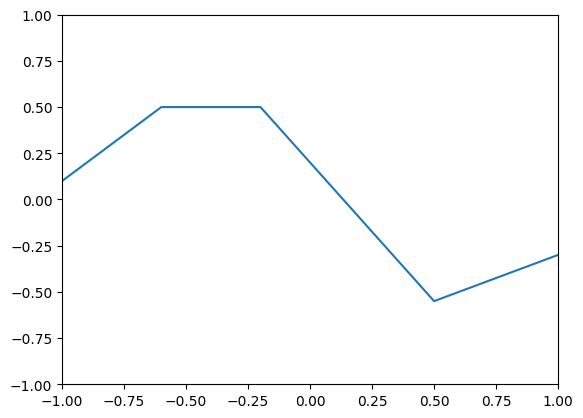

In [75]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

"""
for net2
y = phi0 + phi1 * act(theta10 + theta11*x) + phi2 * act(theta20 + theta21*x) + phi3 * act(theta30 + theta31*x)
y = 0.5 + -1 * ReLU(-0.6 + -1*x) + -1.5 * ReLU(0.2 + x) + 2 * ReLU(-0.5 + x)


"""

def net2(x):
  return 0.5 + -1 * ReLU(-0.6 + -1*x) + -1.5 * ReLU(0.2 + x) + 2 * ReLU(-0.5 + x)

x = np.arange(-1, 1, 0.001)
y = net2(x=x)

plt.plot(x, y)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()


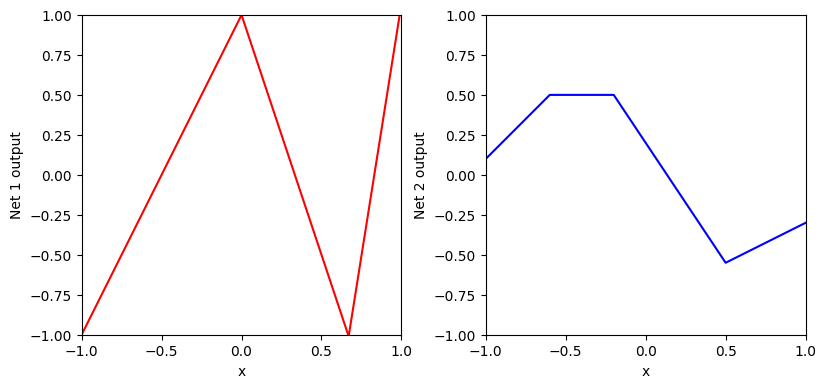

In [76]:
# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

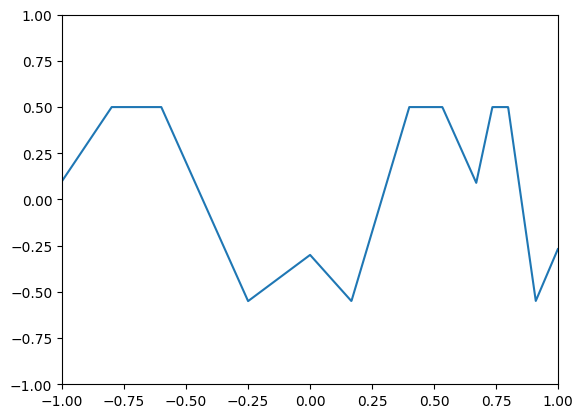

In [77]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the second one.  Draw the relationship between
# the input of the first network and the output of the second one.

"""
Till now we used two nets to map input to output by saying that x gives out of net1 which is input for net2 and then it gives y, making relation of x and net1 and net2 and y.
but in neural networks we are mapping x to y directly.
so for x - net1 function - net2 function - y think of it as
x - net function - y, which in code can be like this
"""

def net(x):
  return 0.5 + -1 * ReLU(-0.6 + -1*net1(x)) + -1.5 * ReLU(0.2 + net1(x)) + 2 * ReLU(-0.5 + net1(x))

x = np.arange(-1, 1, 0.001)
y = net(x=x)

plt.plot(x, y)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

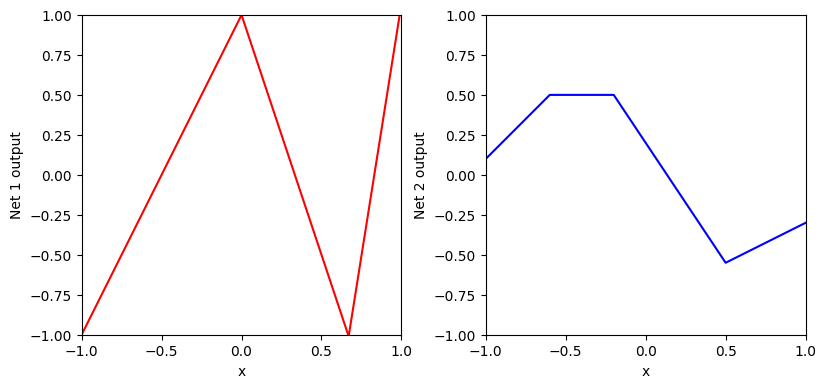

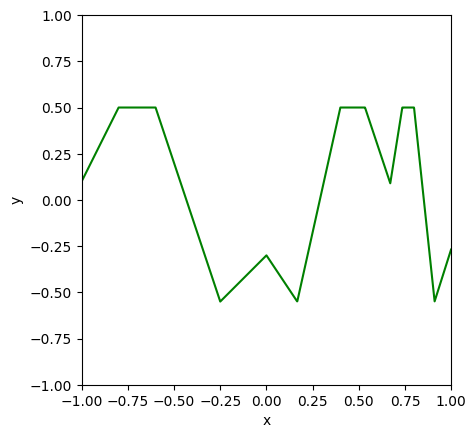

In [78]:
# Now let's see if your predictions were right

# TODO feed the output of first network into second network (replace this line)
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

As expected the plot is the same as above, the one we calculated by solving algebrically

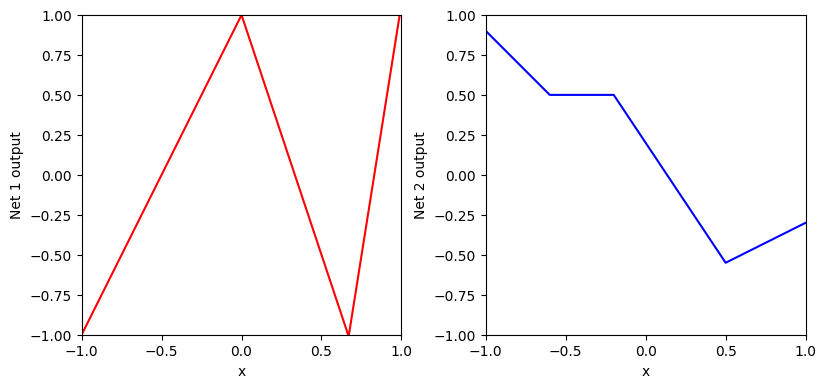

In [79]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

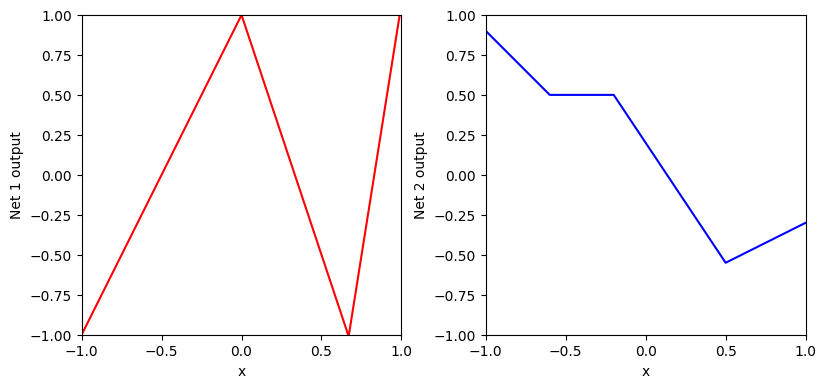

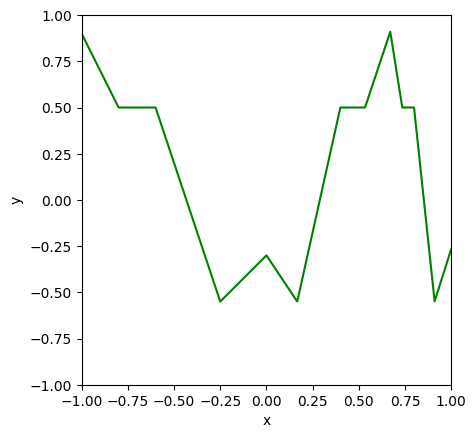

In [80]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the modified second network.  Draw the relationship between
# the input of the first network and the output of the second one.
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

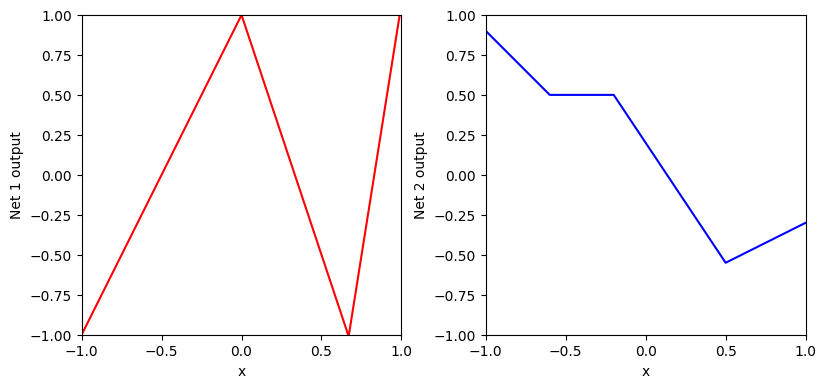

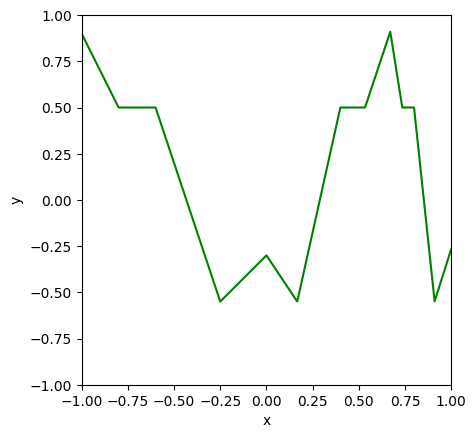

In [81]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

I was! :D

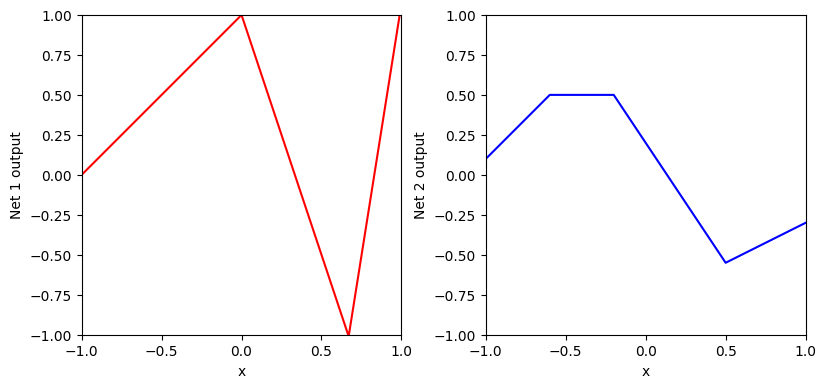

In [82]:
# Let's change things again.  What happens if we change the first network? (note the changes)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

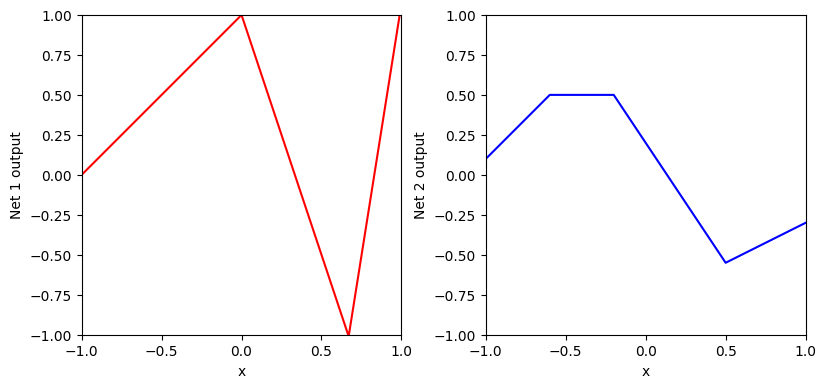

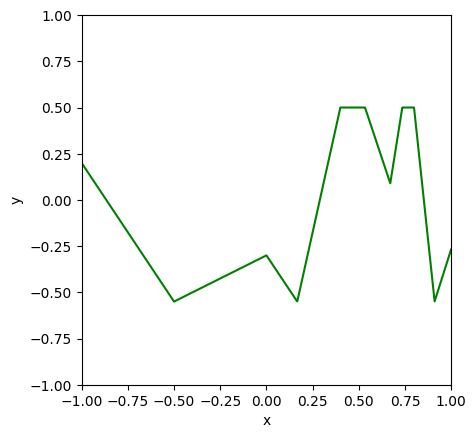

In [83]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the modified first network into the original second network.  Draw the relationship between
# the input of the first network and the output of the second one.
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
#                         ^^^^^^^  here, we are passing output of network1 as input to network 2 and not x

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

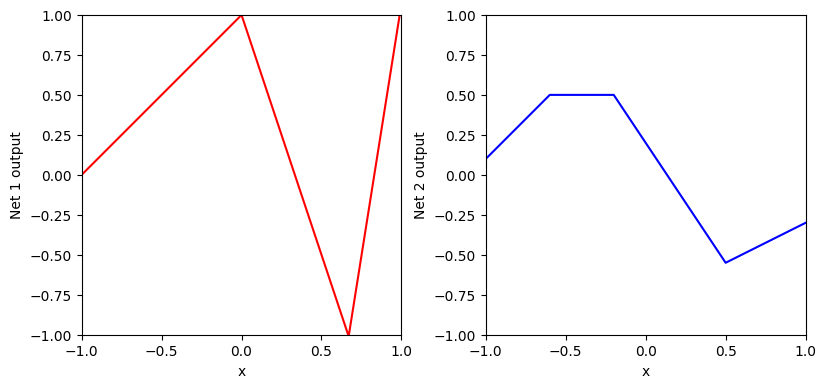

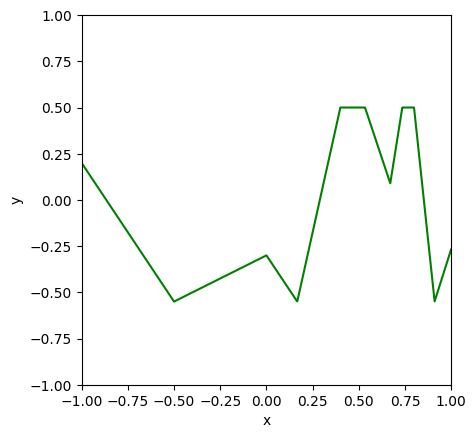

In [84]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

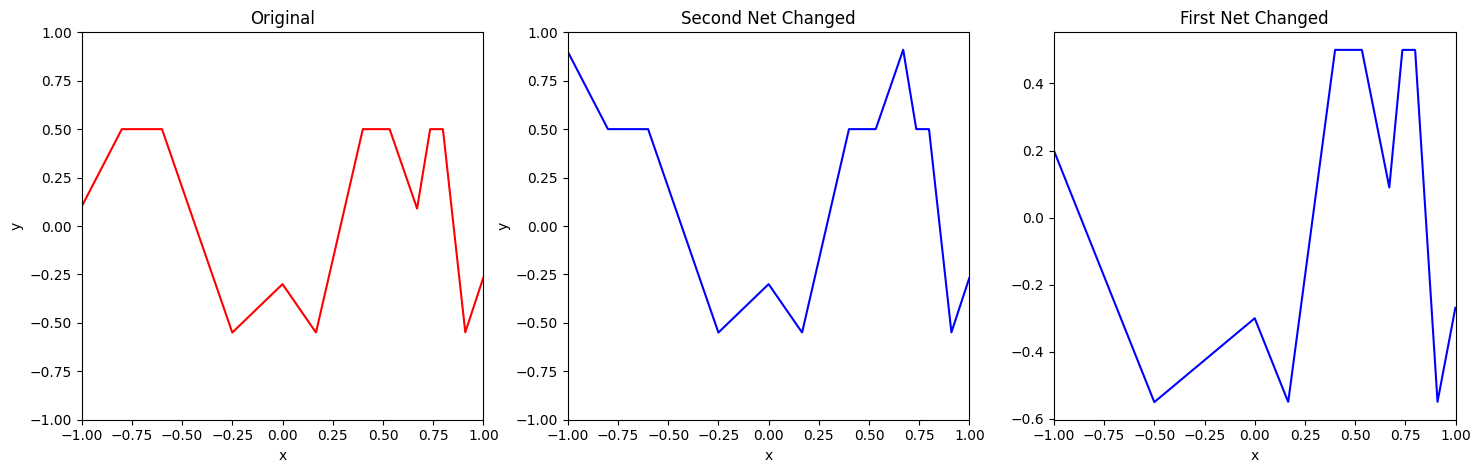

In [85]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

fig.tight_layout(pad=3.0)

# output of original NN
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
original_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# output with second net changed
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
second_net_change_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# output with first net change
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
first_net_change_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)


ax[0].plot(x, original_out,'r-')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
ax[0].set_title('Original')
# ax[0].set_aspect(1.0)
ax[1].plot(x, second_net_change_out,'b-')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
ax[1].set_title('Second Net Changed')
# ax[1].set_aspect(1.0)
ax[2].plot(x, first_net_change_out,'b-')
ax[2].set_xlabel('x'); ax[1].set_ylabel('y')
ax[2].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
ax[2].set_title('First Net Changed')
# ax[2].set_aspect(1.0)

plt.show()

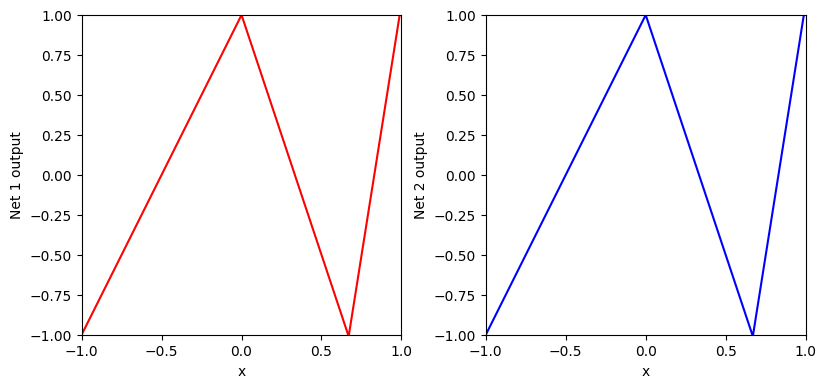

In [86]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

In [87]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the a copy of itself.  Draw the relationship between
# the input of the first network and the output of the second one.

"""
Doing this will increase the complexity in the same function
"""


'\nDoing this will increase the complexity in the same function\n'

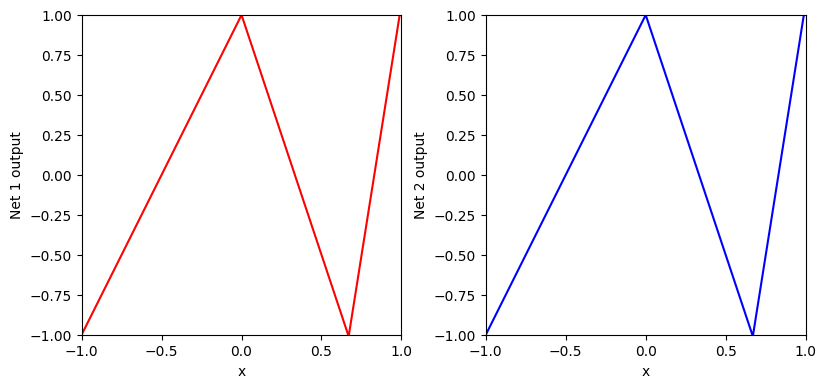

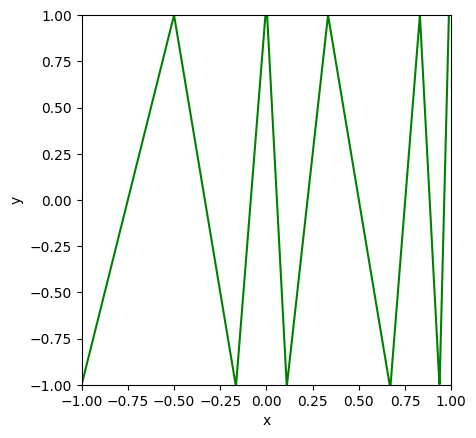

In [88]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

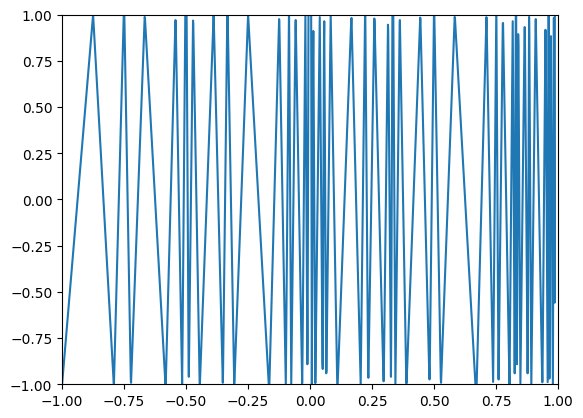

In [89]:
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net3_out_new = shallow_1_1_3(net2_out_new, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net13_out = shallow_1_1_3(net3_out_new, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)


plt.plot(x,net13_out)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

Adding one more extra layer like this will add more complexity but in the same pattern, it can be observed from this image above

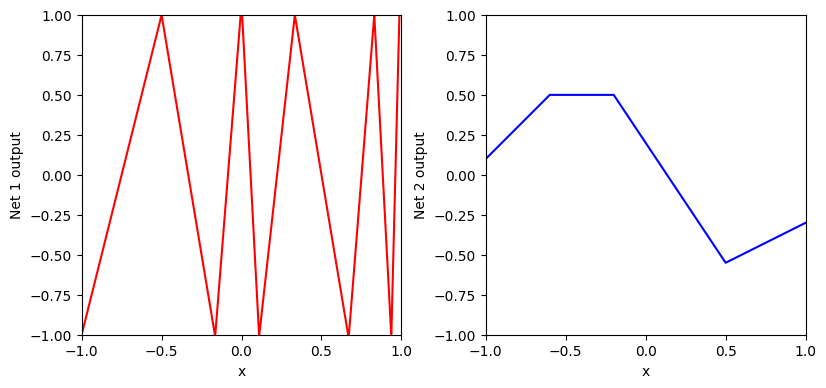

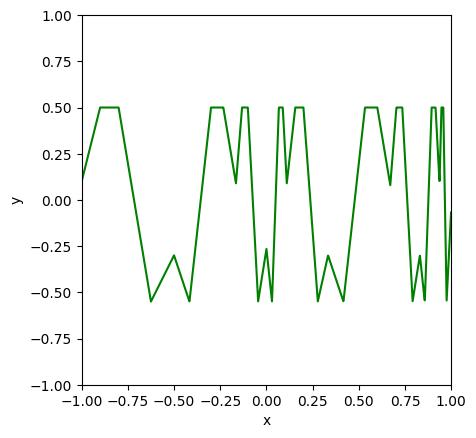

In [90]:
# TODO
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

In [91]:
# TO DO
# How many linear regions would there be if we ran N copies of the first network, feeding the result of the first
# into the second, the second into the third and so on, and then passed the result into the original second
# network (blue curve above)
"""
In general the more hidden layers we add, of the same function(with same wandb parameters) the more linear regions we have due to increased complexity.
"""
# Take away conclusion:  with very few parameters, we can make A LOT of linear regions, but
# they depend on one another in complex ways that quickly become too difficult to understand intuitively.